# (9주차) 5월2일 (2) -- draft

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

## 강의영상 

## import

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.experimental.numpy as tnp

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+ s + ';}')

## 중간고사 관련 잡담 

### 중간고사 3번문제

`-` 특이한모형: 오버핏이 일어날 수 없는 모형이다. 
- 유의미한 coef: 상수항(bias), $\cos(t)$의 계수, $\cos(2t)$의 계수, $\cos(5t)$의 계수. 
- 유의미하지 않은 coef: $\cos(3t)$의 계수, $\cos(4t)$의 계수 
- 유의미하지 않은 계수는 $n%$이 커질수록 0으로 추정된다 =  $\cos(3t)$와 $\cos(5t)$는 사용자가 임의로 제외하지 않아도 결국 모형에서 알아서 제거된다 = overfit이 일어나지 않는다. 모형이 알아서 유의미한 변수만 뽑아서 fit하는 느낌

`-` 3번문제는 overfit이 일어나지 않는다. 이러한 신기한 일이 일어나는 이유는 모든 설명변수가 직교하기 때문임. 
- 이런 모형의 장점: overfit이 일어날 위험이 없으므로 train/test로 나누어 학습할 이유가 없다. (샘플만 버리는 꼴, test에 빼둔 observation까지 모아서 학습해 $\beta$를 좀 더 정확히 추론하는게 차라리 더 이득) 
- 이러한 모형에서 할일: 추정된 계수들이 0인지 아닌지만 test하면 된다. (이것을 유의성검정이라고 한다) 

`-` 직교기저의 예시 
- 빨강과 파랑을 255,255만큼 섞으면 보라색이 된다. 
- 빨강과 파랑과 노랑을 각각 255,255,255만큼 섞으면 검은색이 된다. 
- 임의의 어떠한 색도 빨강,파랑,노랑의 조합으로 표현가능하다. 즉 $\text{color}= \text{red}*\beta_1 + \text{blue}*\beta_2 + \text{yellow}*\beta_3$ 이다. 
- (빨,파,노)는 색을 표현하는 basis이다. (적절한 $\beta_1,\beta_2,\beta_3$을 구하기만 하면 임의의 색도 표현가능)
- (빨,보,노)역시 색을 표현하는 basis라 볼 수 있다. (파란색이 필요할때 보라색-빨간색을 하면되니까) 
- (빨,보,검)역시 색을 표현하는 basis라 볼 수 있다. (파란색이 필요하면 보라색-빨간색을 하면되고, 노란색이 필요하면 검정색-보라색을 하면 되니까)
- (빨,파,노)는 직교기저이다. 

`-` 3번에서 알아둘 것: (1) 직교기저의 개념 (추후 재설명) (2) 임의의 색을 표현하려면 3개의 basis가 필요함 

### 중간고사 1-(3)번 문제

`-` 그림을 그려보자. 

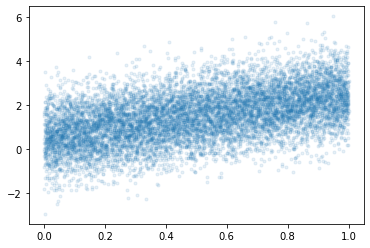

In [4]:
_x= tf.constant(np.arange(1,10001)/10000)
_y= tnp.random.randn(10000) + (0.5 + 2*_x) 
plt.plot(_x,_y,'.',alpha=0.1)

`-` 저것 꼭 10000개 다 모아서 loss계산해야할까? 

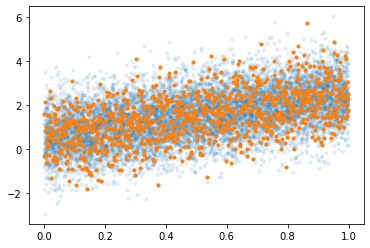

In [5]:
plt.plot(_x,_y,'.',alpha=0.1)
plt.plot(_x[::10],_y[::10],'.') # _x[::10] -> 간격을 10씩 이동하면서 sampling

`-` 대충 이정도만 모아서 해도 비슷하지 않을까? $\to$ 해보자!

## 경사하강법과 확률적경사하강법

`-` 단순회귀분석에서 10개의 샘플이 있다고 가정. $\{(x_i,y_i)\}_{i=1}^{10}$

### ver1: 모든 샘플을 사용하여 slope계산

(epoch1) $loss=\sum_{i=1}^{10}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$

(epoch2) $loss=\sum_{i=1}^{10}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$

...

### ver2: 하나의 샘플만 사용하여 slope계산 

(epoch1) 
- $loss=(y_1-\beta_0-\beta_1x_1)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=(y_2-\beta_0-\beta_1x_2)^2 \quad \to \quad slope \quad \to \quad update$
- ...
- $loss=(y_{10}-\beta_0-\beta_1x_{10})^2 \quad \to \quad slope \quad \to \quad update$

(epoch2) 
- $loss=(y_1-\beta_0-\beta_1x_1)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=(y_2-\beta_0-\beta_1x_2)^2 \quad \to \quad slope \quad \to \quad update$
- ...
- $loss=(y_{10}-\beta_0-\beta_1x_{10})^2 \quad \to \quad slope \quad \to \quad update$

...

### ver3: $m(\leq n)$개의 샘플만 사용하여 slope계산

$m=3$이라고 하자. 

(epoch1) 
- $loss=\sum_{i=1}^{3}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=\sum_{i=4}^{6}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=\sum_{i=7}^{9}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=(y_{10}-\beta_0-\beta_1x_{10})^2 \quad \to \quad slope \quad \to \quad update$

(epoch2) 
- $loss=\sum_{i=1}^{3}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=\sum_{i=4}^{6}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=\sum_{i=7}^{9}(y_i-\beta_0-\beta_1x_i)^2 \quad \to \quad slope \quad \to \quad update$
- $loss=(y_{10}-\beta_0-\beta_1x_{10})^2 \quad \to \quad slope \quad \to \quad update$

...

### 용어의 정리 

#### 옛날 (좀 더 엄밀)

`-` ver1: gradient descent, batch gradient descent 


`-` ver2: stochastic gradient descent

`-` ver3: mini-batch gradient descent, mini-batch stochastic gradient descent

#### 요즘 

`-` ver1: gradient descent


`-` ver2: stochastic gradient descent with batch size = 1 

`-` ver3: stochastic gradient descent 
- https://www.deeplearningbook.org/contents/optimization.html, 알고리즘 8-1 참고. 

note: 이렇게 많이 쓰는 이유? ver1,2는 사실상 없는 방법이므로

### ver1,2,3 이외에 좀 더 지저분한 것들이 있다. 

`-` ver2,3에서 샘플을 셔플할 수도 있다. 

`-` ver3에서 일부 샘플이 학습에 참여 안하는 버전도 있다. 

`-` 개인적 생각: 크게3개정도만 알면 괜찮고 나머지는 그렇게 유의미하지 않아보인다. 

### Discussion 

`-` 핵심개념 
- **메모리사용량: ver1 > ver3 > ver2**
- 계산속도: ver1 > ver3 > ver2 
- local-min에 갇힘: ver1 > ver3 > ver2

`-` 본질: GPU 메모리가 한정되어 있어서 ver1을 쓰지는 못한다. GPU 메모리를 가장 적게쓰는것은 ver2인데 이것은 너무 불안정하다. 

`-` 틀리진 않지만 어색한 블로그 정리 내용들 
- 경사하강법은 종종 국소최소점에 갇히는 문제가 있다. 이를 해결하기 위해서 등장한 방법이 확률적 경사하강법이다. --> 어쩌다 보니까 확률적 경사하강법이 더 잘 빠져나오는것 
- 경사하강법은 계산시간이 오래걸린다. 계산을 빠르게 하기 위해서 등장한 방법이 확률적 경사하강법이다. --> 계산이 빠르단 의미는 1회 업데이트 하는 속도가 빠르다는 의미임. 최종적으로 수렴을 빨리시키는지는 미지수임. 이것은 돌려봐야 안다. 


## fashion_mnist 모듈 

### tf.keras.datasets.fashion_mnist.load_data()

In [6]:
type(tf.keras.datasets.fashion_mnist)

module

In [7]:
type(tf.keras.datasets.fashion_mnist.load_data)

function

In [34]:
dir(tf.keras.datasets.fashion_mnist.load_data)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_keras_api_names',
 '_keras_api_names_v1']

### 데이터생성 및 탐색

`-` tf.keras.datasets.fashion_mnist.load_data()를 이용한 데이터 생성 

In [37]:
tf.keras.datasets.fashion_mnist.load_data?

In [8]:
tf.keras.datasets.fashion_mnist.load_data?? # 코드의 구조를 살펴볼 수 있음

`-` 함수의 return값을 확인하면 (x_train, y_train), (x_test, y_test)로 결과를 받아야 코드가 예뻐짐을 알 수 있다. 

In [9]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


`-` 데이터의 확인 

In [10]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

- x는 60000개의 관측치(이미지의 수)를 가지고 있는듯 보인다. 
- 하나의 obs에 대한 x의 차원은 (28,28)이다. 
- 하나의 obs에 대한 y의 차원은 스칼라다. 

In [11]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

- train과 test의 비율을 6:1로 나눔 

`-` 하나의 관측치가 무엇을 의미할까? 

In [39]:
x_train[0].shape

(28, 28)

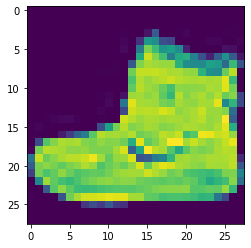

In [12]:
plt.imshow(x_train[0])

- 신발?

In [13]:
y_train[0]

9

- 신발이미지=x, 신발임을 의미하는 숫자 9=y

In [14]:
np.where(y_train == 9)

(array([    0,    11,    15, ..., 59932, 59970, 59978]),)

- y==9인 다른 obs조사 

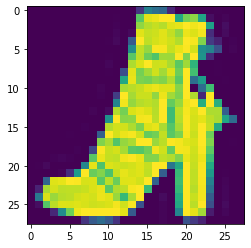

In [15]:
plt.imshow(x_train[11])

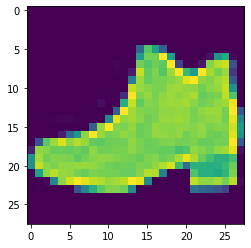

In [40]:
plt.imshow(x_train[15])

- obs0과 유사함

In [16]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [41]:
y_train[:20]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

### 데이터구조 

In [17]:
x_train.shape

(60000, 28, 28)

`-` $\bf{X}$: (n,28,28), 픽셀크기가 28$\times$28 인 이미지 

`-` ${\bf y}$: (n,), 이미지에 대응하는 라벨 (0~9까지의 숫자로 되어있다) 

## 예제1

### 데이터 정리 

`-` y=0,1에 대응하는 이미지만 정리하자. (우리가 배운건 로지스틱이니깐) 

In [18]:
y=y_train[(y_train == 0) | (y_train == 1)]
X=x_train[(y_train == 0) | (y_train == 1)].reshape(-1,784)

In [19]:
yy= y_test[(y_test == 0) | (y_test == 1)]
XX= x_test[(y_test == 0) | (y_test== 1)].reshape(-1,784)

In [20]:
X.shape,y.shape, XX.shape,yy.shape

((12000, 784), (12000,), (2000, 784), (2000,))

### 풀이1: 은닉층을 포함한 신경망  // epochs=100

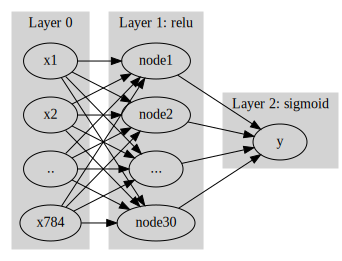

In [21]:
#collapse
gv('''
splines=line
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "x1"
    "x2"
    ".."
    "x784"
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "x1" -> "node1"
    "x2" -> "node1"
    ".." -> "node1"
    
    "x784" -> "node1"
    "x1" -> "node2"
    "x2" -> "node2"
    ".." -> "node2"
    "x784" -> "node2"
    
    "x1" -> "..."
    "x2" -> "..."
    ".." -> "..."
    "x784" -> "..."

    "x1" -> "node30"
    "x2" -> "node30"
    ".." -> "node30"
    "x784" -> "node30"


    label = "Layer 1: relu"
}
subgraph cluster_3{
    style=filled;
    color=lightgrey;
    "node1" -> "y"
    "node2" -> "y"
    "..." -> "y"
    "node30" -> "y"
    label = "Layer 2: sigmoid"
}
''')

In [42]:
#collapse_output
tf.random.set_seed(43055)
net = tf.keras.Sequential() 
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(1,activation='sigmoid'))
net.compile(optimizer='sgd',loss=tf.losses.binary_crossentropy) # SGD
net.fit(X,y,epochs=100,batch_size=12000) 

Epoch 1/100
1/1 [==============================] - 0s 347ms/step - loss: 100.9425
Epoch 2/100
1/1 [==============================] - 0s 64ms/step - loss: 8290.5791
Epoch 3/100
1/1 [==============================] - 0s 66ms/step - loss: 0.7494
Epoch 4/100
1/1 [==============================] - 0s 65ms/step - loss: 0.6898
Epoch 5/100
1/1 [==============================] - 0s 67ms/step - loss: 0.6878
Epoch 6/100
1/1 [==============================] - 0s 61ms/step - loss: 0.6850
Epoch 7/100
1/1 [==============================] - 0s 74ms/step - loss: 0.6803
Epoch 8/100
1/1 [==============================] - 0s 63ms/step - loss: 0.6694
Epoch 9/100
1/1 [==============================] - 0s 66ms/step - loss: 0.6217
Epoch 10/100
1/1 [==============================] - 0s 80ms/step - loss: 0.5796
Epoch 11/100
1/1 [==============================] - 0s 70ms/step - loss: 0.5760
Epoch 12/100
1/1 [==============================] - 0s 65ms/step - loss: 1.0829
Epoch 13/100
1/1 [=========================

In [43]:
np.mean((net(X)>0.5) == y.reshape(12000,1))

0.9715833333333334

In [44]:
np.mean((net(XX)>0.5) == yy.reshape(2000,1))

0.965

### 풀이2: 옵티마이저 개선

In [45]:
#collapse_output
tf.random.set_seed(43055)
net = tf.keras.Sequential() 
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(1,activation='sigmoid'))
net.compile(optimizer='adam',loss=tf.losses.binary_crossentropy) # ADAM
net.fit(X,y,epochs=100,batch_size=12000) 

Epoch 1/100
1/1 [==============================] - 0s 401ms/step - loss: 100.9425
Epoch 2/100
1/1 [==============================] - 0s 69ms/step - loss: 44.4441
Epoch 3/100
1/1 [==============================] - 0s 63ms/step - loss: 29.2322
Epoch 4/100
1/1 [==============================] - 0s 69ms/step - loss: 22.6921
Epoch 5/100
1/1 [==============================] - 0s 67ms/step - loss: 8.7741
Epoch 6/100
1/1 [==============================] - 0s 68ms/step - loss: 4.6409
Epoch 7/100
1/1 [==============================] - 0s 66ms/step - loss: 5.2642
Epoch 8/100
1/1 [==============================] - 0s 68ms/step - loss: 6.1993
Epoch 9/100
1/1 [==============================] - 0s 64ms/step - loss: 6.5543
Epoch 10/100
1/1 [==============================] - 0s 65ms/step - loss: 6.3454
Epoch 11/100
1/1 [==============================] - 0s 71ms/step - loss: 5.7887
Epoch 12/100
1/1 [==============================] - 0s 71ms/step - loss: 5.1074
Epoch 13/100
1/1 [=========================

In [46]:
np.mean((net(X)>0.5) == y.reshape(12000,1))

0.99175

In [47]:
np.mean((net(XX)>0.5) == yy.reshape(2000,1))

0.98

### 풀이3: 컴파일시 metrics=['accuracy'] 추가

In [48]:
#collapse_output
tf.random.set_seed(43055)
net = tf.keras.Sequential() 
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(1,activation='sigmoid'))
net.compile(optimizer='adam',loss=tf.losses.binary_crossentropy,metrics=['accuracy'])
net.fit(X,y,epochs=100,batch_size=12000) 

Epoch 1/100
1/1 [==============================] - 0s 466ms/step - loss: 100.9425 - accuracy: 0.4988
Epoch 2/100
1/1 [==============================] - 0s 64ms/step - loss: 44.4441 - accuracy: 0.3741
Epoch 3/100
1/1 [==============================] - 0s 76ms/step - loss: 29.2322 - accuracy: 0.4321
Epoch 4/100
1/1 [==============================] - 0s 63ms/step - loss: 22.6921 - accuracy: 0.5399
Epoch 5/100
1/1 [==============================] - 0s 73ms/step - loss: 8.7741 - accuracy: 0.7321
Epoch 6/100
1/1 [==============================] - 0s 77ms/step - loss: 4.6409 - accuracy: 0.8516
Epoch 7/100
1/1 [==============================] - 0s 69ms/step - loss: 5.2642 - accuracy: 0.8711
Epoch 8/100
1/1 [==============================] - 0s 68ms/step - loss: 6.1993 - accuracy: 0.8771
Epoch 9/100
1/1 [==============================] - 0s 67ms/step - loss: 6.5543 - accuracy: 0.8845
Epoch 10/100
1/1 [==============================] - 0s 67ms/step - loss: 6.3454 - accuracy: 0.8953
Epoch 11/100


In [49]:
net.evaluate(X,y) # [loss,accuracy]

375/375 [==============================] - 1s 2ms/step - loss: 0.1086 - accuracy: 0.9918


[0.10858089476823807, 0.9917500019073486]

In [50]:
net.evaluate(XX,yy)

63/63 [==============================] - 0s 2ms/step - loss: 0.2933 - accuracy: 0.9800


[0.2932808995246887, 0.9800000190734863]

### 풀이4: 확률적경사하강법 이용 // epochs=10

In [51]:
#collapse_output
tf.random.set_seed(43055)
net = tf.keras.Sequential() 
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(1,activation='sigmoid'))
net.compile(optimizer='adam',loss=tf.losses.binary_crossentropy,metrics=['accuracy'])
net.fit(X,y,epochs=10,batch_size=1200) 

Epoch 1/10
10/10 [==============================] - 0s 10ms/step - loss: 23.5393 - accuracy: 0.7030
Epoch 2/10
10/10 [==============================] - 0s 10ms/step - loss: 3.7197 - accuracy: 0.9328
Epoch 3/10
10/10 [==============================] - 0s 10ms/step - loss: 2.0640 - accuracy: 0.9436
Epoch 4/10
10/10 [==============================] - 0s 9ms/step - loss: 1.0085 - accuracy: 0.9603
Epoch 5/10
10/10 [==============================] - 0s 10ms/step - loss: 0.7690 - accuracy: 0.9645
Epoch 6/10
10/10 [==============================] - 0s 9ms/step - loss: 0.5830 - accuracy: 0.9718
Epoch 7/10
10/10 [==============================] - 0s 9ms/step - loss: 0.4553 - accuracy: 0.9751
Epoch 8/10
10/10 [==============================] - 0s 9ms/step - loss: 0.3711 - accuracy: 0.9783
Epoch 9/10
10/10 [==============================] - 0s 10ms/step - loss: 0.2924 - accuracy: 0.9802
Epoch 10/10
10/10 [==============================] - 0s 9ms/step - loss: 0.2580 - accuracy: 0.9818


In [52]:
net.evaluate(X,y)

375/375 [==============================] - 1s 2ms/step - loss: 0.2336 - accuracy: 0.9839


[0.23357991874217987, 0.9839166402816772]

In [53]:
net.evaluate(XX,yy)

63/63 [==============================] - 1s 5ms/step - loss: 0.3850 - accuracy: 0.9745


[0.3849976360797882, 0.9745000004768372]